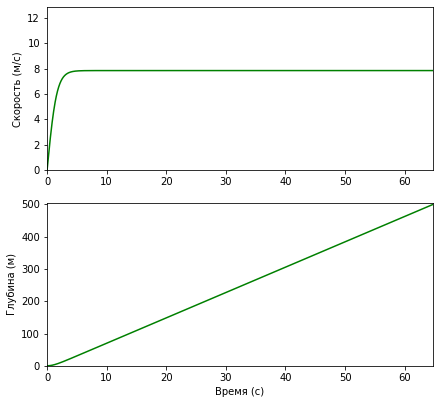

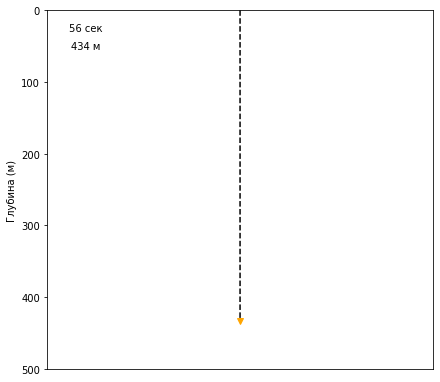

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.animation import FuncAnimation

class InitMenu(Toplevel):
    
    radio_str_font = ("Arial", 12)

    def __init__(self, host):
        super().__init__()
        self.host = host
        self.initUI()
    
    def initUI(self):

        self.configure(background='#FFB700')

        self.rowconfigure(0, weight=1)
        self.rowconfigure(1, weight=1)
        self.rowconfigure(2, weight=1)
        self.rowconfigure(3, weight=1)
        self.rowconfigure(4, weight=1)
        self.rowconfigure(5, weight=1)
        self.rowconfigure(6, weight=1)
        self.rowconfigure(7, weight=1)

        self.columnconfigure(0, weight=1)
        self.columnconfigure(1, weight=1)

        h_mode = True
        self.mode_var = BooleanVar()
        if h_mode:
            self.mode_var.set(0)
        else:
            self.mode_var.set(1)

        self.radio_h = Radiobutton(self, text='Глубина', variable=self.mode_var, value = 1, background='#FFB700').grid(row = 0, column = 1)
        self.radio_t = Radiobutton(self, text='Время', variable=self.mode_var, value = 0, background='#FFB700').grid(row = 0, column = 0)

        self.labelt = Label(self, text='Задержка взрыва (с)', padx = 10, background='#FFB700').grid(row = 1, column = 0)
        self.labelh = Label(self, text='Глубина взрыва (м)', padx = 10, background='#FFB700').grid(row = 1, column = 1)

        self.t_var = StringVar(self, value='5')
        self.entryt = Entry(self, textvariable=self.t_var).grid(row = 2, column = 0)
        self.h_var = StringVar(self, value='100')
        self.entryh = Entry(self, textvariable=self.h_var).grid(row = 2, column = 1)

        form_mode = 0
        self.form_var = IntVar()
        self.form_var.set(form_mode)

        self.radio_0 = Radiobutton(self, text='Полусфера', font=self.radio_str_font, variable=self.form_var, value = 0, background='#FFB700').grid(row = 4, columnspan=2)
        self.radio_1 = Radiobutton(self, text='Сфера', font=self.radio_str_font, variable=self.form_var, value = 1, background='#FFB700').grid(row = 5, columnspan=2)
        self.radio_2 = Radiobutton(self, text='Каплевидная', font=self.radio_str_font, variable=self.form_var, value = 2, background='#FFB700').grid(row = 6, columnspan=2)

        self.ok = Button(self, text = 'Посчитать', pady = 10, command=self.validate).grid(row = 7, columnspan=2)
        
    def validate(self):
        h = self.h_var.get()
        t = self.t_var.get()

        try:
            h = float(h)
            t = float(t)

            if (self.form_var.get() == 0):
                c = 0.55
            elif (self.form_var.get() == 1):
                c = 0.4
            else:
                c = 0.045

            if (self.mode_var.get() == False):
                mode = "t"
            else:
                mode = "h"

            if (h < 1 or h > 10000):
                raise ValueError()
            if (t < 1 or t > 1000):
                raise ValueError()
        except:
            messagebox.showerror("Ошибка", "Некорректные входные данные")
        else:
            #messagebox.showinfo('d', f'mode = {mode}, h = {h}, t = {t}')
            argsParams = ArgsParams(
                time = t,
                c = c,
                h = h,
                mode = mode
            )
            self.host.get_menu_args(argsParams)


class Example(Frame):

    is_calculation = False
    first_time = True
    is_anim = True
    res = None

    frames_pady = 10
    frames_padx = 10

    radio_button_table_str = 'Таблица'
    radio_button_anim_str = 'Анимация'

    calc_button_text_go = 'Расчет'
    calc_button_font =("Arial", 10)
    calc_button_width = 20
    calc_button_height = 1

    animation_str = 'Анимация'
    table_str = 'Таблица'

    res_str_font = ("Arial", 20)

    radio_str_font = ("Arial", 12)

    table_head_font = ("Arial", 14)
    table_str_font = ("Arial", 10)

    def __init__(self):
        super().__init__()

        self.calculator = Calculator()
        self.drawer = Drawer()
        self.initUI()


    def initUI(self):

        self.master.title("Wolfpack")
        self.configure(background='#FFB700')
        self.pack(fill=BOTH, expand=True)

        self.frameHolder = LabelFrame(self)
        self.frameHolder.columnconfigure(0, weight=1)
        self.frameHolder.columnconfigure(1, weight=1)
        self.frameHolder.rowconfigure(0, weight=1)
        self.frameHolder.pack(fill=BOTH, expand=1)

        self.frame_anim = Frame(self.frameHolder)
        self.frame_anim.grid(column=0, row=0, sticky=E+W+S+N)
        
        self.frame_table = Frame(self.frameHolder)
        self.frame_table.columnconfigure(0, weight=1)
        self.frame_table.columnconfigure(1, weight=2)
        self.frame_table.columnconfigure(2, weight=2)
        self.frame_table.columnconfigure(3, weight=0)
        self.frame_table.rowconfigure(0, weight=0)
        self.frame_table.rowconfigure(1, weight=1)

        self.frame_table.grid(column=0, row=0, sticky=E+W+S+N)
        self.frame_table.grid_remove()

        self.frame_graph = Frame(self.frameHolder)
        self.frame_graph.grid(column=1, row=0, sticky=E+W+S+N)

        self.label_time = Label(self.frame_table, text='Время (с)', font=self.table_head_font).grid(column=0, row=0)
        self.label_height = Label(self.frame_table, text='Глубина (м)', font=self.table_head_font).grid(column=1, row=0)
        self.label_speed = Label(self.frame_table, text='Скорость (м/с)', font=self.table_head_font).grid(column=2, row=0)

        self.lab = Label(self.frame_table, text='Hello', background='red').grid(row=1, columnspan=3, sticky=E+W+S+N)

        self.canvas = Canvas(self.frame_table, borderwidth=0, highlightthickness=0)
        self.embedded_frame = Frame(self.canvas)
        self.vsb = Scrollbar(self.frame_table, orient="vertical", command=self.canvas.yview)
        self.canvas.configure(yscrollcommand=self.vsb.set)

        self.frame_table.grid_propagate(False)

        self.vsb.grid(row=1, column=3, sticky=S+N)
        self.canvas.grid(row=1, columnspan=3, sticky=E+W+S+N)
        self.canvas_frame = self.canvas.create_window((0,0), window=self.embedded_frame, anchor="nw", tags="embedded_frame")
        self.embedded_frame.bind("<Configure>", self.onFrameConfigure)
        self.canvas.bind('<Configure>', self.FrameWidth)
        self.embedded_frame.columnconfigure(0, weight=1)
        self.embedded_frame.columnconfigure(1, weight=2)
        self.embedded_frame.columnconfigure(2, weight=2)


        self.frame_buttons = Frame(self, background='#FFB700')
        self.frame_buttons.pack(side=BOTTOM, fill=X, expand = 1)

        self.calc_button = Button(
            self.frame_buttons,
            text = self.calc_button_text_go,
            font = self.calc_button_font,
            height= self.calc_button_height,
            width= self.calc_button_width,
            command = self.calculate_button_click
        )
        self.calc_button.pack(side=BOTTOM, pady = (10, 0))
 
        self.resLabel = Label(self.frame_buttons, text='\n\n', font = self.res_str_font, background='#FFB700')
        self.resLabel.pack()


        self.radio_frame = Frame(self.frame_buttons, background='#FFB700')
        self.radio_frame.pack()

        self.radio_var = BooleanVar()
        if self.is_anim:
            self.radio_var.set(0)
        else:
            self.radio_var.set(1)

        self.radio_anim = Radiobutton(self.radio_frame, text='Анимация', font=self.radio_str_font, variable=self.radio_var, value =0, command=self.radio_change, background='#FFB700').pack(side=LEFT)
        self.radio_table = Radiobutton(self.radio_frame, text='Таблица', font=self.radio_str_font, variable=self.radio_var, value =1, command=self.radio_change, background='#FFB700').pack(side=RIGHT)

        self.fig, self.axs=plt.subplots(2,1)
        self.fig.set_size_inches(2,5)

        self.fig2, self.axs2=plt.subplots()
        self.fig2.set_size_inches(2,5)

        self.axs[1].set_xlabel('Время (с)')
        self.axs[1].set_ylabel('Глубина (м)')
        self.axs[0].set_ylabel('Скорость (м/с)')
        self.axs2.set_ylabel('Глубина (м)')

        self.axs2.set_xlim([-0.5, 0.5])
        self.axs2.tick_params(
            axis='x',          
            which='both',      
            bottom=False,      
            top=False,         
            labelbottom=False) 
        self.axs2.invert_yaxis()

        self.chart2 = FigureCanvasTkAgg(self.fig2, self.frame_anim)
        #self.chart2.get_tk_widget().grid(row=0, column=0, sticky=N+S+W+E)
        self.chart2.get_tk_widget().pack(fill=BOTH, expand=1)
        self.chart = FigureCanvasTkAgg(self.fig, self.frame_graph)
        self.chart.get_tk_widget().pack(fill=BOTH, expand=1)

    def FrameWidth(self, event):
        canvas_width = event.width
        self.canvas.itemconfig(self.canvas_frame, width = canvas_width)

    def onFrameConfigure(self, event):
        '''Reset the scroll region to encompass the inner frame'''
        self.canvas.configure(scrollregion=self.canvas.bbox("all"))

    def radio_change(self):
        if self.radio_var.get() == 0:
            self.is_anim = True
            self.frame_table.grid_remove()
        else:
            self.is_anim = False
            self.frame_table.grid()

    def calculate_button_click(self):
 #       calc = self.is_calculation
        self.show_dialog()           

    def show_dialog(self):
        self.init_menu = InitMenu(self)
        self.init_menu.geometry("325x350+740+300")
        self.init_menu.title('Начальные данные')
        self.init_menu.transient(self)
        self.init_menu.grab_set()
        self.init_menu.focus_set()
        self.init_menu.wait_window()

    def get_menu_args(self, argsParams):
        self.init_menu.destroy()
        self.start_stop_calculation(argsParams)

    def start_stop_calculation(self, argsParams=None):
        self.is_calculation = True
        self.start_calculation(argsParams)

    def start_calculation(self, argsParams):
        self.radio_var.set(False)
        self.radio_change()
        self.res = self.calculator.calculate(argsParams)
        self.resLabel.config(text=f'Бомба взорвалась на глубине {round(self.res.h_detonate,2)} м, с задержкой {round(self.res.time_expl, 2)} с')
        self.draw_graphs(self.res, self.is_anim)
        self.fill_table(self.res)

    def draw_graphs(self, res, animate):
        if res is not None:
            self.drawer.draw_graphs(self.fig, self.axs, self.fig2, self.axs2, res, animate)

    def fill_table(self, res):
        frame = self.embedded_frame
        color = 'white'
        for row in range(len(res.T)):
            Label(frame, text=f'{round(res.T[row],2)}', font=self.table_str_font, borderwidth="0.5", width=2, relief="solid", background=color).grid(row=row, column=0, sticky=E+W+S+N)
            Label(frame, text=f'{round(res.H[row],2)}', font=self.table_str_font, borderwidth="0.5", width=2, relief="solid", background=color).grid(row=row, column=1, sticky=E+W+S+N)
            Label(frame, text=f'{round(res.V[row],3)}', font=self.table_str_font, borderwidth="0.5", width=2, relief="solid", background=color).grid(row=row, column=2, sticky=E+W+S+N)


def main():

    root = Tk()
    root.geometry("1000x700+400+200")
    app = Example()
    root.mainloop()

class ArgsParams:
    def __init__(
        self,
        time,
        c,
        mode,
        h
    ):
        self.time = time
        self.c = c
        self.mode = mode
        self.h = h

class Result:
    def __init__(
        self,
        mode,
        time_expl,
        h_detonate,
        V,
        H,
        T,
    ):
        self.mode = mode
        self.time_expl = time_expl
        self.h_detonate = h_detonate
        self.V = V
        self.H = H
        self.T = T

class Drawer():

    animation_time = 5
    first_time = True
    animation = False
    animation_height = False

    def stop_anim(self):
        if (self.animation):
            self.anim.event_source.stop()
        if (self.animation_height):
            self.anim2.event_source.stop()

    def draw_graphs(self, fig, axs, fig2, axs2, res, animate):
        self.stop_anim()
        self._preset(axs, res)
        self._draw(fig, axs, fig2, axs2, res)
        if animate:
            self._draw_animation(fig2, axs2, res)

    def _draw_animation(self, fig2, axs2, res): 
        self.animation_height = True

        axs2.invert_yaxis()  
        axs2.set_ylim([0, max(res.H)])
        axs2.set_xlim([-0.5, 0.5])
        axs2.set_ylabel('Глубина (м)')
        axs2.tick_params(
            axis='x',          
            which='both',      
            bottom=False,      
            top=False,         
            labelbottom=False) 
        axs2.invert_yaxis()
        
        bar, = axs2.plot([5,10,11], [5,10,11], linestyle='--', color='black')
        point, = axs2.plot([], [], 'v', color='orange', linewidth=10)
        time = axs2.text(0.1, 0.95, '', horizontalalignment='center', verticalalignment='center', transform=axs2.transAxes)
        height = axs2.text(0.1, 0.90, '', horizontalalignment='center', verticalalignment='center', transform=axs2.transAxes)

        def animate2(i, V, T, H):

            bar.set_data([0]*len(H[:i]), H[:i])
            point.set_data([0], H[i])
            height.set_text(f'{round(H[i])} м')
            time.set_text(f'{round(T[i])} сек')
            return bar, point, height, time,

        self.anim2 = FuncAnimation(fig2, animate2, frames = len(res.T), interval=self.animation_time, fargs=(res.V, res.T, res.H),  repeat=True, blit=True)


    def _draw(self, fig, axs, fig2, axs2, res):
        self.animation = True
        if (not self.first_time):
            axs2.cla()

        lineV, = axs[0].plot([], [], color = 'green')
        lineH, = axs[1].plot([], [], color = 'green')

        Vdata = []
        Tdata = []
        Hdata = []

        def animate(i, V, T, H):
            if i == 0:
                Vdata.clear()
                Tdata.clear()
                Hdata.clear()
            Vdata.append(V[i])
            Tdata.append(T[i])
            Hdata.append(H[i])

            lineV.set_data(Tdata, Vdata)
            lineH.set_data(Tdata, Hdata)
            return lineV, lineH,

        self.anim = FuncAnimation(fig, animate, frames = len(res.T), interval=0, fargs=(res.V, res.T, res.H),  repeat=False, blit=True)

    def _preset(self, axs, res):
        axs[1].clear()
        axs[0].clear()

        axs[1].set_xlabel('Время (с)')
        axs[1].set_ylabel('Глубина (м)')
        axs[0].set_ylabel('Скорость (м/с)')
        axs[0].set_xlim([res.T[0], res.T[-1]])
        axs[0].set_ylim([0, max(res.V)+5])
        axs[1].set_xlim([res.T[0], res.T[-1]])
        axs[1].set_ylim([0, max(res.H)+5])

class Calculator():

    def calculate(self, inputParams):
        time_expl= inputParams.time
        mode = inputParams.mode
        h_target = inputParams.h
        #messagebox.showinfo('d', f'mode = {mode}, h = {time_expl}, t = {h_target}')
        c = inputParams.c
        m = 123
        l = 1.5
        r = 0.12
        p = 1033
        u = 1.002
        #полусфера
        if (c == 0.55):
            vo = (4/6)*np.pi*r**2
        #шар
        elif (c == 0.4):
            vo = (4/3)*np.pi*r**2 
        #каплевидная
        elif (c == 0.045):
            vo = (l - r)*(1/3)*np.pi*r**2 + (4/6)*np.pi*r**2
        s = np.pi*(r**2)
        GConst=6.67430*10**(-11)
        MEarth=5.9722*10**(24)
        r0=6378137
        h0 = 0
        dt=0.05
        k1 = 6*np.pi*u*r
        k2= 0.5*c*s*p
        g0=GConst*MEarth/(r0)**2
        t0=0
        H=[]
        T=[]
        V=[]
        G=[]
        T.append(t0)
        G.append(g0)
        H.append(h0)
        V.append(0)

        while True:
            h = H[-1]
            v = V[-1]
            g = GConst*MEarth/(r0-h)**2
            #g = 9.81
            t = T[-1]
            #messagebox.showinfo('d', f'{g} - {(k1*v + k2*v**2 + p*g*vo)/m}')
            v = v + (g-(k1*v + k2*v**2 + p*g*vo)/m)*dt
            h += v*dt 
            t += dt
            T.append(t)
            H.append(h)
            V.append(v)
            G.append(g)
            if ((mode == "t" and t >= time_expl) or (mode == "h" and h >= h_target)):
                break
            
        return Result(mode, T[-1], H[-1], V, H, T)

if __name__ == '__main__':
    main()